Loan Delinquency Prediction

Loan default prediction is one of the most critical and crucial problem faced by financial institutions and organizations as it has a noteworthy effect on the profitability of these institutions. In recent years, there is a tremendous increase in the volume of non – performing loans which results in a jeopardizing effect on the growth of these institutions.
 
Therefore, to maintain a healthy portfolio, the banks put stringent monitoring and evaluation measures in place to ensure timely repayment of loans by borrowers. Despite these measures, a major proportion of loans become delinquent. Delinquency occurs when a borrower misses a payment against his/her loan.

 
Given the information like mortgage details, borrowers related details and payment details, our objective is to identify the delinquency status of loans for the next month given the delinquency status for the previous 12 months (in number of months)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
from catboost import CatBoostClassifier,Pool, cv
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score

train = pd.read_csv("C:\\Users\\Acer\\Loan Delinquency Prediction\\train_u5jK80M\\train.csv")
test = pd.read_csv("C:\\Users\\Acer\\Loan Delinquency Prediction\\test_3BA6GZX\\test.csv")
print(train.shape,test.shape)
train.head()

(116058, 29) (35866, 28)


,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [2]:
test.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,Y,Browning-Hart,3.875,417000,360,01/02/12,Apr-12,75,1,...,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,01/02/12,Apr-12,80,2,...,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,01/01/12,Mar-12,75,1,...,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,01/02/12,Apr-12,41,2,...,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,01/02/12,Apr-12,53,2,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494155e+11,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.597560e+11,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.000009e+11,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.743034e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999971e+11,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,...,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [4]:
# Checking for Null Values
train.isnull().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         0
dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
loan_id                     116058 non-null int64
source                      116058 non-null object
financial_institution       116058 non-null object
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
origination_date            116058 non-null object
first_payment_date          116058 non-null object
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null float64
debt_to_income_ratio        116058 non-null float64
borrower_credit_score       116058 non-null float64
loan_purpose                116058 non-null object
insurance_percent           116058 non-null float64
co-borrower_credit_score    116058 non-null float64
insurance_type              116058 non-null float64
m1                          116058 non-null int64
m2                  

# Checking Class Balanced or Unbalanced

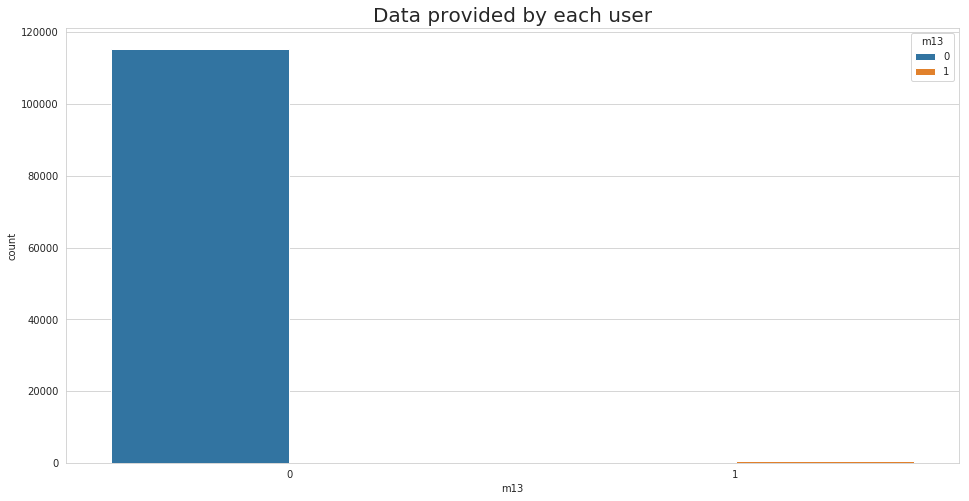

In [6]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='m13',hue='m13', data = train)
plt.show()

In [7]:
train['m13'].value_counts()

0    115422
1       636
Name: m13, dtype: int64

In [8]:
train['source'].value_counts()

X    63858
Y    37554
Z    14646
Name: source, dtype: int64

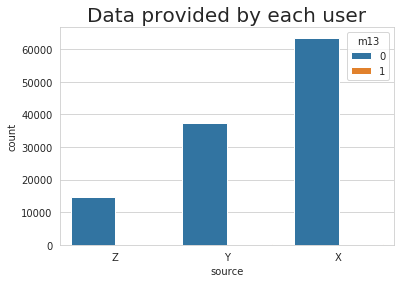

In [9]:
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='source',hue='m13', data = train)
plt.show()

# Financial Institution

In [10]:
train['financial_institution'].value_counts()

OTHER                          49699
Browning-Hart                  31852
Swanson, Newton and Miller      6874
Edwards-Hoffman                 4857
Martinez, Duffy and Bird        4715
Miller, Mcclure and Allen       3158
Nicholson Group                 2116
Turner, Baldwin and Rhodes      1846
Suarez Inc                      1790
Cole, Brooks and Vincent        1642
Richards-Walters                1459
Taylor, Hunt and Rodriguez      1259
Sanchez-Robinson                1193
Sanchez, Hays and Wilkerson      853
Romero, Woods and Johnson        750
Thornton-Davis                   651
Anderson-Taylor                  483
Richardson Ltd                   473
Chapman-Mcmahon                  388
Name: financial_institution, dtype: int64

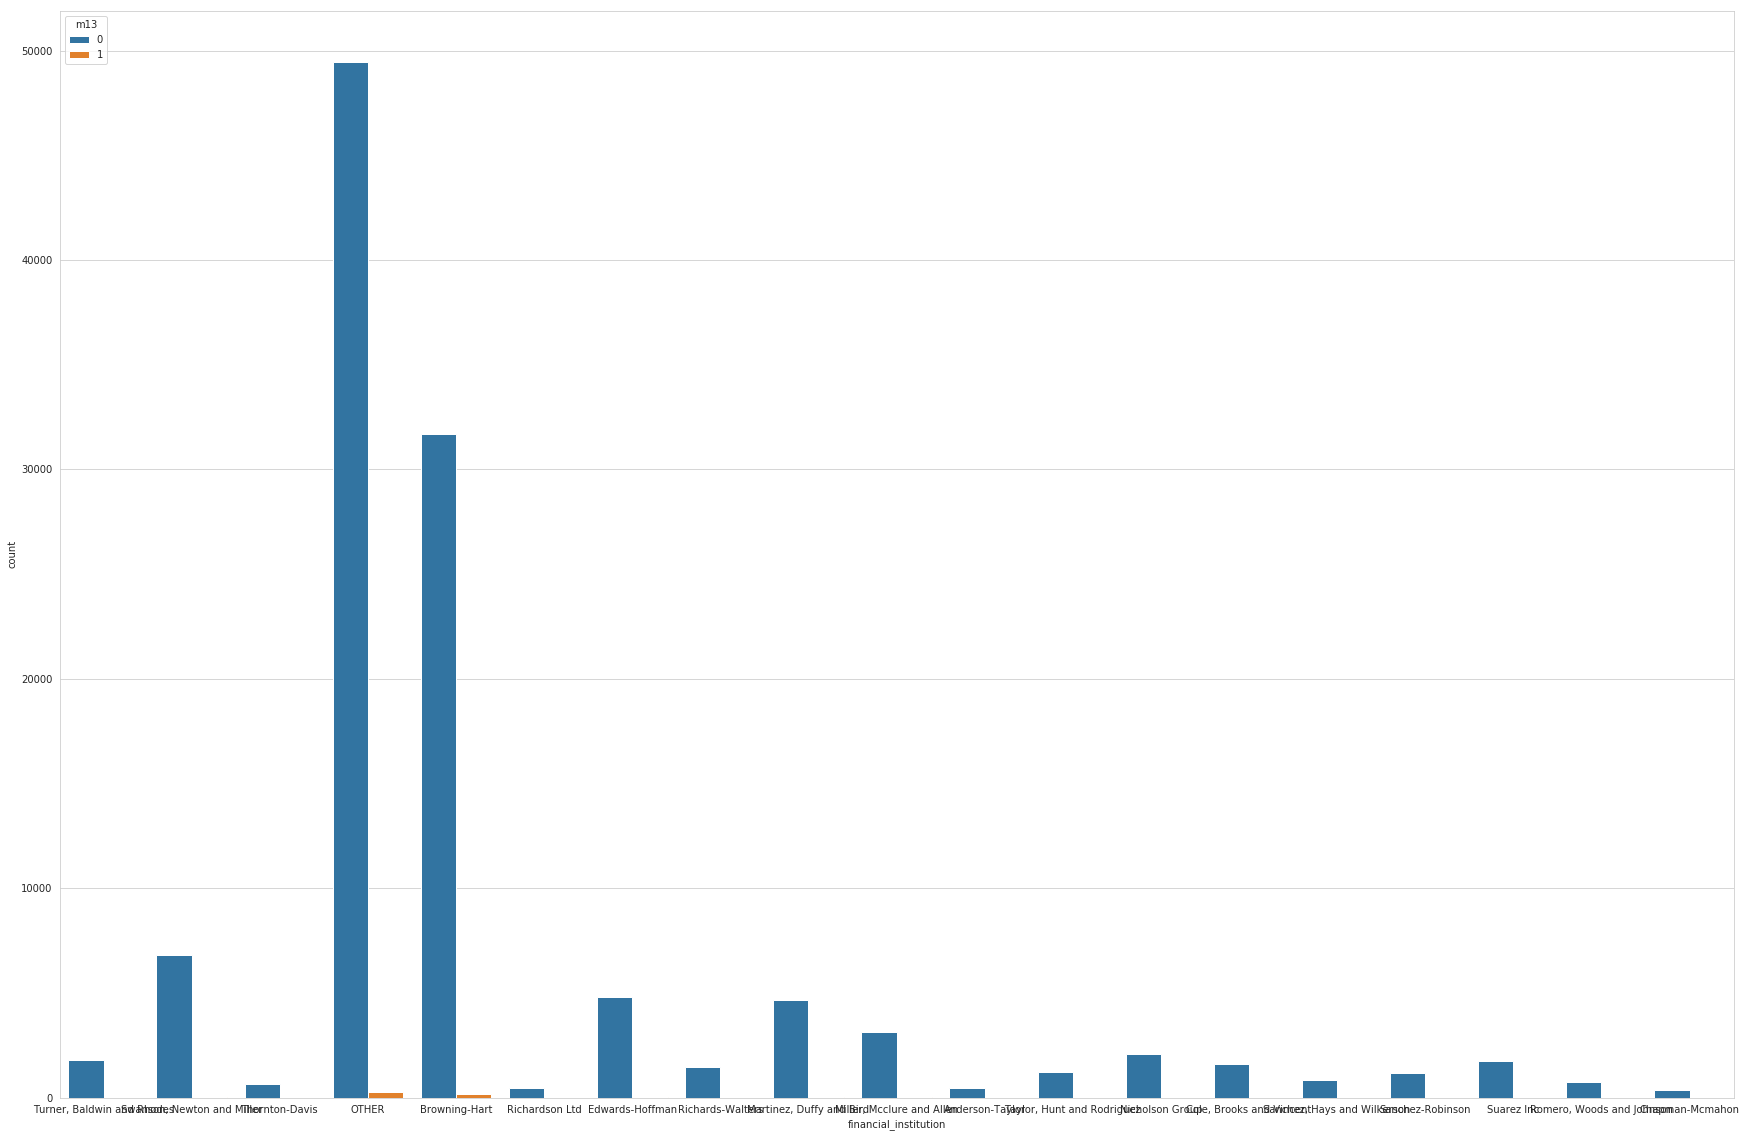

In [11]:
plt.figure(figsize=(30,20))
sns.countplot(x='financial_institution',hue='m13', data = train)

In [12]:
train[['financial_institution','m13']].pivot_table(index='financial_institution', columns='m13', 
                        aggfunc=len, fill_value=0)

m13,0,1
financial_institution,,
Anderson-Taylor,480,3
Browning-Hart,31677,175
Chapman-Mcmahon,388,0
"Cole, Brooks and Vincent",1630,12
Edwards-Hoffman,4816,41
"Martinez, Duffy and Bird",4692,23
"Miller, Mcclure and Allen",3139,19
Nicholson Group,2105,11
OTHER,49430,269


# Interest Rate

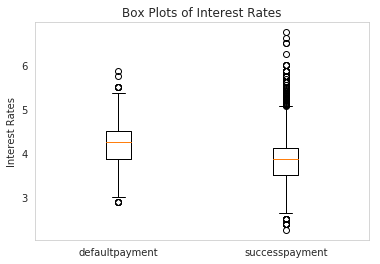

In [13]:
defaultpayment = train[train['m13']==1]['interest_rate'].values

successpayment = train[train['m13']==0]['interest_rate'].values
plt.boxplot([defaultpayment, successpayment])
plt.title('Box Plots of Interest Rates')
plt.xticks([1,2],('defaultpayment','successpayment'))
plt.ylabel('Interest Rates')
plt.grid()
plt.show()

# Unpaid Principal Balance

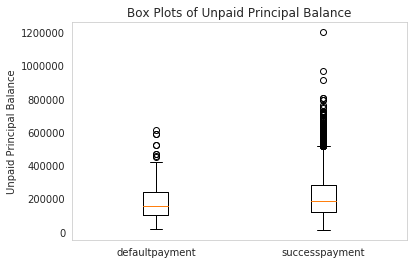

In [14]:
defaultpayment = train[train['m13']==1]['unpaid_principal_bal'].values

successpayment = train[train['m13']==0]['unpaid_principal_bal'].values
plt.boxplot([defaultpayment, successpayment])
plt.title('Box Plots of Unpaid Principal Balance')
plt.xticks([1,2],('defaultpayment','successpayment'))
plt.ylabel('Unpaid Principal Balance')
plt.grid()
plt.show()

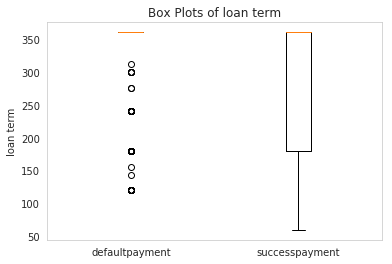

In [15]:
defaultpayment = train[train['m13']==1]['loan_term'].values

successpayment = train[train['m13']==0]['loan_term'].values

plt.boxplot([defaultpayment, successpayment])
plt.title('Box Plots of loan term')
plt.xticks([1,2],('defaultpayment','successpayment'))
plt.ylabel('loan term')
plt.grid()
plt.show()

In [16]:
def format_date(col):
    temp = []
    for x in pd.to_datetime(col, format="%Y-%m-%d"):
        if x > pd.to_datetime('today'):    temp.append(x - pd.DateOffset(years=100))
        else:                              temp.append(x)
    return temp

def format_date_test(col):
    temp = []
    for x in pd.to_datetime(col, format="%d/%m/%y"):
        if x > pd.to_datetime('today'):    temp.append(x - pd.DateOffset(years=100))
        else:                              temp.append(x)
    return temp

def format_date_train(col):
    temp = []
    for x in pd.to_datetime(col, format="%m/%Y"):
        if x > pd.to_datetime('today'):    temp.append(x - pd.DateOffset(years=100))
        else:                              temp.append(x)
    return temp

def format_date_testt(col):
    temp = []
    for x in pd.to_datetime(col, format="%b-%y"):
        if x > pd.to_datetime('today'):    temp.append(x - pd.DateOffset(years=100))
        else:                              temp.append(x)
    return temp

In [17]:
train['first_payment_date']  =  format_date_train(train['first_payment_date'])
train['first_payment_day']    =  train['first_payment_date'].dt.day
train['first_payment_month']  =  train['first_payment_date'].dt.month
train['first_payment_year']   =  train['first_payment_date'].dt.year

test['first_payment_date']  =  format_date_testt(test['first_payment_date'])
test['first_payment_day']    =  test['first_payment_date'].dt.day
test['first_payment_month']  =  test['first_payment_date'].dt.month
test['first_payment_year']   =  test['first_payment_date'].dt.year

train['origination_date']  =  format_date(train['origination_date'])
train['origination_day']    =  train['origination_date'].dt.day
train['origination_month']  =  train['origination_date'].dt.month
train['origination_year']   =  train['origination_date'].dt.year

test['origination_date']  =  format_date_test(test['origination_date'])
test['origination_day']    =  test['origination_date'].dt.day
test['origination_month']  =  test['origination_date'].dt.month
test['origination_year']   =  test['origination_date'].dt.year

In [18]:
train.drop(columns = ['financial_institution','origination_date','first_payment_date'], axis = 1, inplace = True)
test.drop(columns = ['financial_institution','origination_date','first_payment_date'], axis = 1, inplace = True)

In [19]:
train = pd.get_dummies(train,columns = ['loan_purpose','source'])
test = pd.get_dummies(test,columns = ['loan_purpose','source'])

As we see earlier the class is highly unbalanced and we need to balance it. We can also use smote and other technique for balancing it.

In [20]:
from sklearn.utils import resample
#Seprate majority and minority Classes
train_majority = train[train.m13 == 0]
train_minority = train[train.m13 == 1]
# Upsample minority Class
train_minority_upsampled = resample(train_minority,replace = True,n_samples = 115422,random_state = 1234)
# Combine majority class with upsampled minority class
train_upsampled = pd.concat([train_majority,train_minority_upsampled])
#Display New Class Counts
train_upsampled.m13.value_counts()

1    115422
0    115422
Name: m13, dtype: int64

In [21]:
X_train = train.drop(['loan_id','m13'],axis = 1)
Y_train = train['m13']
X_test = test.drop(['loan_id'],axis = 1).copy()

In [22]:
x_train,x_val,y_train,y_val = train_test_split(X_train,Y_train,test_size = 0.25,random_state = 1994,stratify = Y_train)

In [23]:
err = []
y_pred_tot = []

from sklearn.model_selection import StratifiedShuffleSplit

fold = StratifiedShuffleSplit(n_splits = 10,random_state = 1994)
i = 1
for train_index, test_index in fold.split(X_train,Y_train):
    x_train,X_test = X_train.iloc[train_index],X_train.iloc[test_index]
    y_train,y_test = Y_train[train_index],Y_train[test_index]
    m=LGBMClassifier(n_estimators=300,random_state=1994,learning_rate=0.03,colsample_bytree=0.2,objective='binary',scale_pos_weight=1)
    m.fit(X_train,Y_train,eval_set=[(X_test, y_test)],eval_metric='auc',early_stopping_rounds=200,verbose=200)
    preds=m.predict_proba(X_test)[:,-1]
    print("err: ",roc_auc_score(y_test,preds))
    err.append(roc_auc_score(y_test,preds))
    p = m.predict_proba(X_test)[:,-1]
    i=i+1
    y_pred_tot.append(p)

Training until validation scores don't improve for 200 rounds.
[200]	valid_0's auc: 0.994842	valid_0's binary_logloss: 0.0104491
Did not meet early stopping. Best iteration is:
[288]	valid_0's auc: 0.9968	valid_0's binary_logloss: 0.00908873
err:  0.9967997314156992
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's auc: 0.985895	valid_0's binary_logloss: 0.0144553
Did not meet early stopping. Best iteration is:
[297]	valid_0's auc: 0.992721	valid_0's binary_logloss: 0.0127076
err:  0.9927208780973834
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's auc: 0.977017	valid_0's binary_logloss: 0.014124
Did not meet early stopping. Best iteration is:
[293]	valid_0's auc: 0.985098	valid_0's binary_logloss: 0.0127151
err:  0.9850979033096517
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's auc: 0.976075	valid_0's binary_logloss: 0.0144804
Did not meet early stopping. Best iteration is:
[297]	valid_0's auc: 

In [24]:
categorical_features_indices = np.where(x_train.dtypes =='category')[0]
categorical_features_indices

array([], dtype=int64)

In [25]:
m=CatBoostClassifier(n_estimators=2500,random_state=1994,learning_rate=0.03,eval_metric='AUC')
m.fit(x_train,y_train,eval_set=[(x_val, y_val.values)], early_stopping_rounds=200,verbose=200,cat_features=categorical_features_indices)
p=m.predict_proba(x_val)[:,-1]
print(roc_auc_score(y_val,p))

0:	test: 0.5817774	best: 0.5817774 (0)	total: 138ms	remaining: 5m 44s
200:	test: 0.9235297	best: 0.9236527 (196)	total: 15.7s	remaining: 3m
400:	test: 0.9318836	best: 0.9318836 (400)	total: 31.6s	remaining: 2m 45s
600:	test: 0.9386856	best: 0.9386860 (597)	total: 47.5s	remaining: 2m 30s
800:	test: 0.9445148	best: 0.9445148 (800)	total: 1m 3s	remaining: 2m 14s
1000:	test: 0.9504061	best: 0.9504061 (1000)	total: 1m 19s	remaining: 1m 58s
1200:	test: 0.9549927	best: 0.9549927 (1200)	total: 1m 35s	remaining: 1m 43s
1400:	test: 0.9579016	best: 0.9579404 (1384)	total: 1m 51s	remaining: 1m 27s
1600:	test: 0.9607812	best: 0.9608736 (1597)	total: 2m 7s	remaining: 1m 11s
1800:	test: 0.9628498	best: 0.9628871 (1799)	total: 2m 22s	remaining: 55.4s
2000:	test: 0.9659173	best: 0.9659173 (2000)	total: 2m 38s	remaining: 39.6s
2200:	test: 0.9676867	best: 0.9678111 (2190)	total: 2m 54s	remaining: 23.7s
2400:	test: 0.9690164	best: 0.9690164 (2400)	total: 3m 10s	remaining: 7.86s
2499:	test: 0.9693586	best: